In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set the max columns to none
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

from ast import literal_eval

import statistics
from statistics import mode

from nltk import ngrams

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load user, hotel, and location data
df_user = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/Final_Dataset_User_ML.csv', index_col=[0])
df_hotel_ML = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/Final_Dataset_Hotel_ML.csv', index_col=[0])

## Create Test Set For User Data 

In [3]:
df_u = df_user.copy()

In [4]:
# mengubah kolom reviewed_hotel dengan jumlah len arraynya (array di konversi menggunakan literal_eval)
df_u['reviewed_hotel'] = df_u['reviewed_hotel'].apply(lambda x: len(np.array(literal_eval(x))))
df_u

,user_id,most_reviewed,reviewed_hotel,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV

In [5]:
df_u.sort_values(by='reviewed_hotel', ascending=False)

,user_id,most_reviewed,reviewed_hotel,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV

In [6]:
df_u.groupby(by='reviewed_hotel').count()

,user_id,most_reviewed,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Control

In [7]:
df_u.iloc[:, 3:]

,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Controlled Lights and Fan,Rol

In [8]:
from sklearn.model_selection import train_test_split
X = df_u.iloc[:, 3:]
y = df_u['reviewed_hotel']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [9]:
print('jumlah seluruh  : ', len(df_u))
print('jumlah data train : ', len(X_train))
print('jumlah data test : ', len(X_test))

jumlah seluruh  :  9219
jumlah data train :  6914
jumlah data test :  2305


In [10]:
# pesebaran data train
y_train.groupby(by=y_train.values).count()

1    6599
2     241
3      49
4      17
5       4
6       2
7       2
Name: reviewed_hotel, dtype: int64

In [11]:
# pesebaran data test
y_test.groupby(by=y_test.values).count()

1    2200
2      81
3      16
4       6
5       1
6       1
Name: reviewed_hotel, dtype: int64

In [12]:
y_train.append(y_test)

5336    1
96      2
2599    1
3542    1
468     1
       ..
4778    1
2882    1
1700    1
559     1
165     1
Name: reviewed_hotel, Length: 9219, dtype: int64

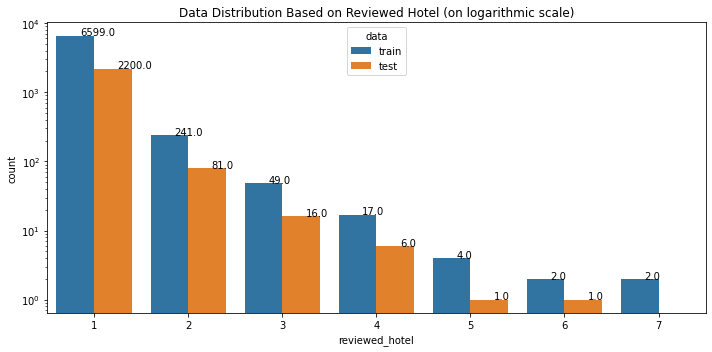

In [13]:
plt.rcParams["figure.figsize"] = [10.00, 5]
plt.rcParams["figure.autolayout"] = True

df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

df_y_train['data'] = 'train'
df_y_test['data'] = 'test'

df = df_y_train.append(df_y_test)

ax = sns.countplot(x='reviewed_hotel', data=df, hue='data')
ax.set_yscale('log')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Data Distribution Based on Reviewed Hotel (on logarithmic scale)')
plt.show()